# Выбор локации для скважины

**Описание**

Нефтедобывающей компании нужно решить, где бурить новую скважину. Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

**Задача:** построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Необходимо проанализировать возможную прибыль и риски.

**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- Распределения данных идентичны реальным, но в целях соблюдения коммерческой тайны сами данные и наименования признаков были подвергнуты маскингу.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Обучение-и-результаты" data-toc-modified-id="Обучение-и-результаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение и результаты</a></span><ul class="toc-item"><li><span><a href="#Обучение-первой-модели" data-toc-modified-id="Обучение-первой-модели-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Обучение первой модели</a></span></li><li><span><a href="#Отбор-признаков-для-первой-модели" data-toc-modified-id="Отбор-признаков-для-первой-модели-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Отбор признаков для первой модели</a></span></li><li><span><a href="#Вывод-по-отбору-признаков-для-первой-модели" data-toc-modified-id="Вывод-по-отбору-признаков-для-первой-модели-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Вывод по отбору признаков для первой модели</a></span></li><li><span><a href="#Обучение-второй-модели" data-toc-modified-id="Обучение-второй-модели-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Обучение второй модели</a></span></li><li><span><a href="#Обучение-третьей-модели" data-toc-modified-id="Обучение-третьей-модели-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Обучение третьей модели</a></span></li></ul></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-подготовке-расчета-прибыли" data-toc-modified-id="Вывод-по-подготовке-расчета-прибыли-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по подготовке расчета прибыли</a></span></li></ul></li><li><span><a href="#Расчет-рисков-и-прибыли-в-каждом-регионе" data-toc-modified-id="Расчет-рисков-и-прибыли-в-каждом-регионе-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет рисков и прибыли в каждом регионе</a></span><ul class="toc-item"><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Первый регион</a></span></li><li><span><a href="#Второй-регион" data-toc-modified-id="Второй-регион-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Второй регион</a></span></li><li><span><a href="#Третий-регион" data-toc-modified-id="Третий-регион-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Третий регион</a></span></li><li><span><a href="#Итоговый отчет" data-toc-modified-id="Итоговый отчет-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Итоговый отчет</a></span>

# Импорт библиотек

In [1]:
import math

import re

import numpy as np

from scipy import stats as st

import statsmodels.api as sm

import pandas as pd

import matplotlib.pyplot as plt

!pip install scikit-learn --upgrade -q

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

from sklearn.metrics import r2_score, root_mean_squared_error

from sklearn.dummy import DummyRegressor

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

RANDOM_STATE = 17

test_size = 0.25

BUDGET_AKA_COSTS = 10_000_000_000
ITEM_PRICE = 450_000
REG_WELLS_TOTAL = 500
BEST_WELLS = 200

# Функции для проекта

In [2]:
def residuals_analysis_plotter(y_true, y_pred, mean_line_text=(1, 1), bins=50, scatter_grid=False):
    
    residuals = y_true - y_pred
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].hist(residuals, bins=bins)
    
    ax[0].set_title('распределение остатков (ошибок) модели')
    ax[0].set_xlabel('ошибка', size=13)
    ax[0].set_ylabel('частота', size=13)
    
    ax[0].grid()
    
    ax[0].axvline(residuals.mean(), color='C3', linestyle='dashed', linewidth=2.15)
    ax[0].text(x=mean_line_text[0], y=mean_line_text[1], s='Остаточное среднее: {:.2f}'.format(residuals.mean()), size=10)
    
    ax[1].scatter(y_pred, residuals)
    
    ax[1].set_title('дисперсия остатков (ошибок) модели')
    ax[1].set_xlabel('объем запасов, тыс. баррелей', size=13)
    ax[1].set_ylabel('цена ошибки (error)', size=13)
    
    if scatter_grid == True:
        ax[1].grid()
    else:
        pass
    
    plt.show()

In [3]:
def needed_mean_capacity_probability_evaluation(df):
    
    state = np.random.RandomState(RANDOM_STATE)
    
    results = []

    for i in range(1000):
        
        subsample = df.sample(n=500, replace=True, random_state=state)['product']

        mu = subsample.mean()
        std = subsample.std()
        normdist = st.norm(mu, std)

        results.append(1 - normdist.cdf(111.11))
        
    return round(np.mean(results), 2)

In [4]:
def big_number_formatter(number_or_list):
    
    units = ['', 'K', 'M', 'B', 'T', 'P']
    k = 1000.0
    
    if type(number_or_list) != list:

        if number_or_list > 0:
            
            magnitude = int(math.floor(math.log(number_or_list, k)))
            
        elif number_or_list < 0:
            
            magnitude = int(math.floor(math.log(np.abs(number_or_list), k)))
            
        else:
            
            return 0
        
        return '%.2f%s' % (number_or_list / k**magnitude, units[magnitude])
    
    else:
        
        arr = []
        
        for i in number_or_list:
            
            if i > 0:
                
                magnitude = int(math.floor(math.log(i, k)))
                arr.append('%.2f%s' % (i / k**magnitude, units[magnitude]))
                
            elif i < 0:
                
                magnitude = int(math.floor(math.log(np.abs(i), k)))
                arr.append('%.2f%s' % (i / k**magnitude, units[magnitude]))

            else:
                
                arr.append(0)
                
        return arr

In [5]:
def profit_function(y_true_sample, y_pred_sample):

    best_wells_pred = y_pred_sample.sort_values(ascending=False)[:BEST_WELLS]
    wells_true_pred = y_true_sample[best_wells_pred.index]
    
    total_capacity = np.sum(wells_true_pred)
    profit = total_capacity * ITEM_PRICE - BUDGET_AKA_COSTS
    
    return profit

In [6]:
def bootstrap(y_true, y_pred, num_subsamples):

    state = np.random.RandomState(RANDOM_STATE)

    values = []

    for i in range(num_subsamples):
        
        subsample_true = y_true.sample(n=REG_WELLS_TOTAL, replace=True, random_state=state)
        
        predictions = pd.Series(y_pred)
        predictions.index = y_true.index
        
        subsample_pred = predictions[subsample_true.index]
        
        values.append(profit_function(subsample_true, subsample_pred))

    values = pd.Series(values)
    
    return values

In [7]:
def confidence_interval(values):
    confidence_interval = (values.quantile(0.025), values.quantile(0.975))
    print('95%-й доверительный интервал распределения прибыли:',
          big_number_formatter(confidence_interval[0]),
          '—',
          big_number_formatter(confidence_interval[1])
         )

In [8]:
def profit_mean(values):
    print(f'Средняя выборочная прибыль: {big_number_formatter(values.mean())}')

In [9]:
def normtest(values):

    normtest = st.shapiro(values)

    alpha = 0.05
    
    print('p-value теста Шапиро-Уилка:', normtest.pvalue)
    
    if normtest.pvalue > alpha:
        print('Вероятно, распределение нормальное')
    else:
        print('Вероятно, распределение не нормальное')

In [10]:
def loss_graph(values):
    
    threshold_value = 10_000_000_000

    mu = values.mean()
    std = values.std()
    
    def loss_probability_function(sarr):
    
        loss_probability = sarr[sarr < 0].count() / len(sarr)
    
        return loss_probability
    
    loss_probability = loss_probability_function(values)
    
    print('Вероятность понести убытки: {}%'.format(round(loss_probability * 100, 2)))
    print('2.5%-й квантиль для распределения потенциальной прибыли в регионе:', big_number_formatter(values.quantile(0.025)))

    fig, ax = plt.subplots(figsize=(20, 10))

    ax.hist(values, bins=50, density=True, alpha=0.6, color='g')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = st.norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)

    title = 'dist_params: mu = {},  std = {}'.format(big_number_formatter(mu), big_number_formatter(std))
    plt.title(title, fontsize=20)
    
    ax.set_xlabel('прибыль', fontsize=15)
    ax.set_ylabel('наблюдения', fontsize=15)
    
    def convert_to_numbers(f):
        return "{:.1e}".format(f) if re.match("^-?[^\.]e",str(f)) else str(f)
    
    arr = []
    for i in ax.get_xticks():
        arr.append(float(convert_to_numbers(i)))
    
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(big_number_formatter(arr))

    
    ax.axvline(x=values.mean(), color='b', linestyle='--')
    ax.text(x=values.mean()*1.05, y=0.0000000001, s='μ = {}'.format(big_number_formatter(values.mean())), fontsize=13)
    
    if values.quantile(0.025) > 0:
    
        ax.axvline(x=0, color='r', linestyle='--')
        ax.text(x= 500_000_000 / 5 * -0.2, y=0.000000001, s='порог прибыли', fontsize=13, horizontalalignment='right')

        ax.axvline(x=values.quantile(0.025), color='c', linestyle='--')
        ax.text(x=values.quantile(0.025) * 1.25, y=0.0000000006, s='q 2.5%', fontsize=13)
    
    else:
        
        ax.axvline(x=0, color='r', linestyle='--')
        ax.text(x=500_000_000 / 5 * 0.3, y=0.0000000013, s='порог прибыли', fontsize=13)

        ax.axvline(x=values.quantile(0.025), color='c', linestyle='--')
        ax.text(x=values.quantile(0.025) * 3, y=0.0000000006, s='q 2.5%', fontsize=13)
    
    plt.show()

## Загрузка и подготовка данных

### Загрузка данных

Загружаем данные и смотрим, с чем нам придется работать. Начнем с первого датасета.

In [11]:
gd_0 = pd.read_csv('/datasets/geo_data_0.csv')
display(gd_0.head(3))
print(gd_0.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Данные выглядят нормально; всего у нас 100,000 объектов, пропусков нет, тип данных соответствует значениям. Посмотрим на второй датасет:

In [12]:
gd_1 = pd.read_csv('/datasets/geo_data_1.csv')
display(gd_1.head(3))
print(gd_1.info())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


К этому датасету применимо все то же, что и к первому.

In [13]:
gd_2 = pd.read_csv('/datasets/geo_data_2.csv')
display(gd_2.head(3))
print(gd_2.info())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


То же касается и последнего датасета. Что ж, проведем быструю визуализацию, чтобы иметь общие представления об имеющихся данных.

geo_data_0:


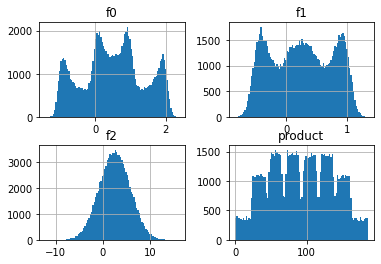

geo_data_1:


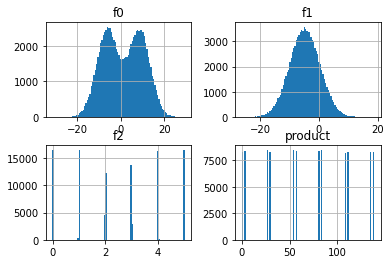

geo_data_2:


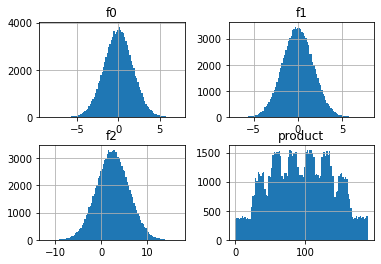

In [14]:
print('geo_data_0:')
gd_0.hist(bins=100)
plt.show()

print('geo_data_1:')
gd_1.hist(bins=100)
plt.show()

print('geo_data_2:')
gd_2.hist(bins=100)
plt.show()

Вроде все в порядке, однако во втором датасете 'gd_1' наблюдаются странные распределения признака 'f2' и целевого признака 'product'. Взглянем на них поближе.

In [15]:
print(gd_1['product'].nunique())

print(gd_1['product'].unique())

print(gd_1['f2'].nunique())

12
[  3.17910258  26.95326103 134.76630516 137.94540774  84.03888568
 110.99214671  53.90652206   0.         107.81304413  57.08562465
  30.13236361  80.85978309]
100000


Что ж, похоже, что у нас всего 12 уникальных значений целевого признака, а среди значений признака 'f2' нет ни одного повторяющегося. Построим гистограммы побольше.

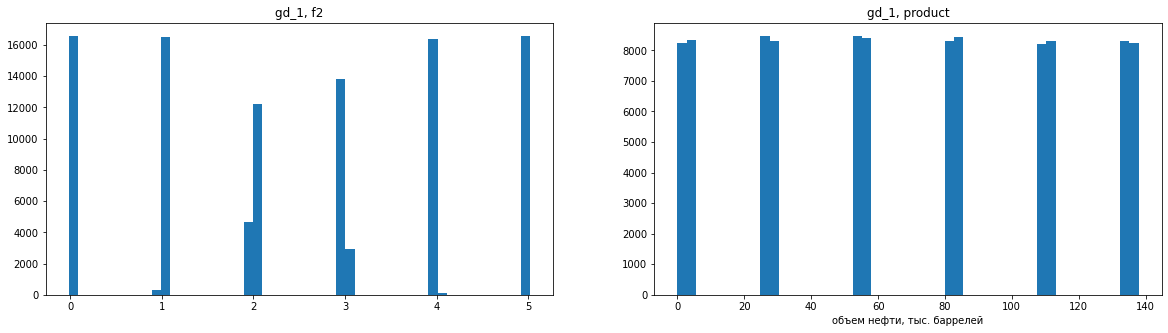

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].hist(gd_1['f2'], bins=50)
ax[0].set_title('gd_1, f2')

ax[1].hist(gd_1['product'], bins=50)
ax[1].set_title('gd_1, product')
ax[1].set_xlabel('объем нефти, тыс. баррелей')

plt.show()

Похоже, в случае входного признака 'f2' ультимативная уникальность каждого значения объясняется большим количеством знаков после запятой, а все значения распределены вокруг чисел от 0 до 5. Количество таких пиков на графике подозрительно совпадает с количеством мест концентрации целевого признака. Можно предположить, что данный входной признак является определяющим, а остальные - уточняющими и определяющими объем нефти в скважине в чуть меньшую или чуть большую сторону. Больше по этому поводу сказать нечего, ведь особой информации о данных у нас нет. Разве что всё равно такое чересчур точное и скудное распределение целевого признака по значениям (всего их 12) с учетом количества знаков после запятой всё ещё выглядит подозрительно. Вероятно, это связано с синтетической природой данных.

Каких-то видимых аномалий в данных у нас нет, поэтому нам остается только приступить к подготовке данных и обучению моделей, но сначала на всякий случай проверим наши данные на дубликаты.

In [17]:
print(gd_0['id'].nunique())
print(gd_0.duplicated().sum())

print(gd_1['id'].nunique())
print(gd_1.duplicated().sum())

print(gd_2['id'].nunique())
print(gd_2.duplicated().sum())

print('#############################')

print(gd_0.duplicated(subset=gd_0.drop(['id'], axis=1).columns).sum())
print(gd_1.duplicated(subset=gd_1.drop(['id'], axis=1).columns).sum())
print(gd_2.duplicated(subset=gd_2.drop(['id'], axis=1).columns).sum())

99990
0
99996
0
99996
0
#############################
0
0
0


У нас есть совпадающие id, однако повторяющихся объектов без учета идентификаторов у нас нет, что говорит о том, что полных и неполных дубликатов в данных у нас нет.

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Возможно стоило посмотреть еще на корреляции признаков, потому что мультиколлинеарность негативно влияет на качество моделей. А построение диаграмм рассеяния позволит выявить нелинейные связи

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента </b>

Я думал об этом, но решил особо не запариваться, поскольку в данном случае нам предписано использовать только линейную регрессию, и поиск нелинейных взаимосвязей нам ничем бы особо не помог. Я далее попробовал, конечно, применить полиномизацию, но она не принесла особых результатов. А по поводу исследования мультиколлинеарности: для первой и третьей модели это не имеет смысла по причине явной нелинейности в данных, а для второй ненужно, поскольку коэффициент детерминации для неё и так идеальный, а средняя ошибка очень мала. Сверх того, у нас и так входных признаков негусто, поэтому вероятность наличия мультиколлинеарности минимальна. Да и по самому заданию и характеру данных понятно, что такое вряд ли тут встретится. Я понимаю, что так делать, мягко говоря, не следует, но, признаюсь честно, поленился и посчитал, что по всем признакам (задаче, данным и моделям) этим можно пренебречь. &#x1F605;
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Ок) Хотя если я был бы твои тим лидом, я бы все равно попросил посчитать)))

### Подготовка данных

Приступим к подготовке. Разобъем наши данные на выборки.

In [18]:
X_0 = gd_0.drop(['id', 'product'], axis=1)
y_0 = gd_0['product']

X_1 = gd_1.drop(['id', 'product'], axis=1)
y_1 = gd_1['product']

X_2 = gd_2.drop(['id', 'product'], axis=1)
y_2 = gd_2['product']

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=test_size, random_state=RANDOM_STATE)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=test_size, random_state=RANDOM_STATE)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=test_size, random_state=RANDOM_STATE)

создадим список столбцов для масштабирования.

In [19]:
num_cols = ['f0', 'f1', 'f2']

подготовим пайплайн и сетку параметров с разными скейлерами для кросс-валидации.

In [20]:
data_preprocessing = ColumnTransformer(
    [
       ('num', MinMaxScaler(), num_cols) 
    ],
    
    remainder='passthrough'
)

pipe = Pipeline(
    [
        ('preprocessing', data_preprocessing),
        ('models', LinearRegression())
    ]
)

pdst = [
    {
        'preprocessing__num': [StandardScaler(),
                               MinMaxScaler(),
                               RobustScaler(),
                               'passthrough'
                              ]
    }
]

Можно приступать к обучению и оценке моделей.

## Обучение и проверка модели

### Обучение и результаты

#### Обучение первой модели

Выполним поиск по сетке; он не должен занять много времени, так как у нас не так много гиперпараметров для подбора. Использовать будем только линейную регрессию, так как это указано в условиях задач. Будем ориентироваться на RMSE, поскольку это тоже указано в условиях задачи.

In [21]:
grid = GridSearchCV(estimator=pipe,
                      param_grid=pdst,
                      cv=5,
                      scoring='neg_root_mean_squared_error',
                      n_jobs=-1,
                      verbose=1
                     )

Обучаем первую модель и анализируем результаты.

Fitting 5 folds for each of 4 candidates, totalling 20 fits
############################################
лучший скейлер: {'preprocessing__num': StandardScaler()}
R^2 лучшей модели: 0.27
RMSE лучшей модели: 37.79
среднее предсказание лучшей модели на тесте: 92.39061493772542


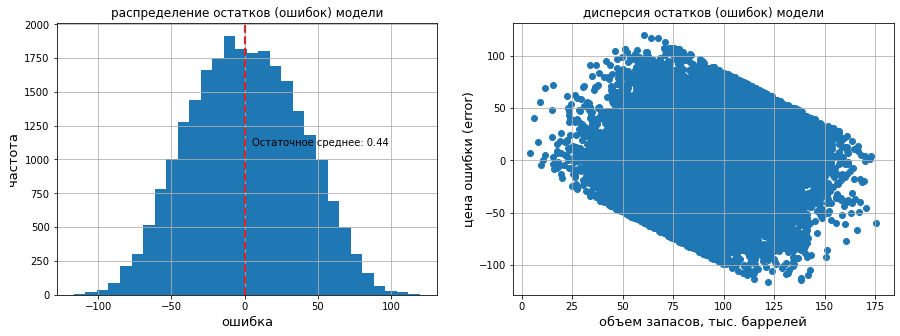

In [22]:
grid_0 = grid.fit(X_train_0, y_train_0)

y_pred_0 = grid_0.best_estimator_.predict(X_test_0)

print(f'############################################\nлучший скейлер: {grid_0.best_params_}')
print(f'R^2 лучшей модели: {round(r2_score(y_test_0, y_pred_0), 2)}')
print(f'RMSE лучшей модели: {round(root_mean_squared_error(y_test_0, y_pred_0), 2)}')
print(f'среднее предсказание лучшей модели на тесте: {y_pred_0.mean()}')

residuals_analysis_plotter(y_test_0, y_pred_0, (5, 1100), 30, scatter_grid=True)

Первая модель показала посредственные результаты: низкий коэффициент детерминации (0.27) и довольно внушительная среднеквадратичная ошибка, учитывая порядок значений целевого признака. Распределение ошибок похоже на нормальное, распределенное вокруг 0 с незначительным смещением вправо, что говорит о небольшом систематическом занижении предсказаний. Дисперсия ошибок значительная и похожа на 'коврик': непостоянна и смещена таким образом, что для объектов с малыми запасами нефти оценка завышается, а для объектов с большими запасами - занижается.

#### Отбор признаков для первой модели

Чтобы улучшить нашу модель, попробуем полиномизировать наши признаки, обучим ещё одну модель на тех же данных и оценим их важность.

In [23]:
poly_preprocessing = ColumnTransformer(
    [
        ('poly', PolynomialFeatures(degree=3), num_cols),
        ('num', MinMaxScaler(), num_cols)
    ],
    
    remainder='passthrough'
)

poly_pipe = Pipeline(
    [
        ('preprocessing', poly_preprocessing),
        ('models', LinearRegression())
    ]
)

grid_poly = GridSearchCV(estimator=poly_pipe,
                         param_grid=pdst,
                         cv=5,
                         scoring='neg_root_mean_squared_error',
                         n_jobs=-1,
                         verbose=1
                        )

grid_0_0 = grid_poly.fit(X_train_0, y_train_0)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Теперь оценим результат.

############################################
лучший скейлер: {'preprocessing__num': MinMaxScaler()}
R^2 лучшей модели: 0.29
RMSE лучшей модели: 37.34
среднее предсказание лучшей модели на тесте: 92.5067092779863


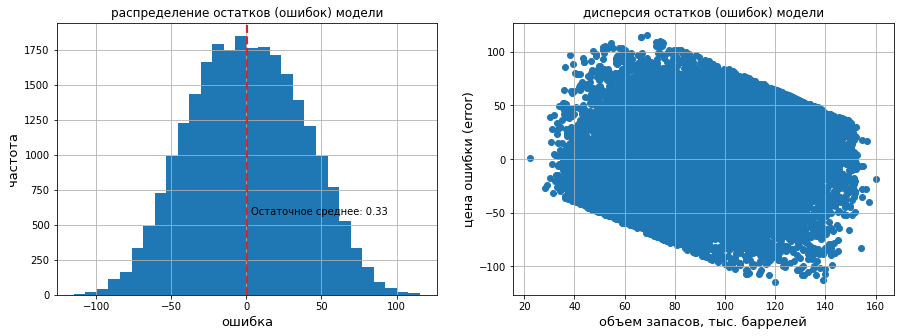

In [24]:
y_pred_0_0 = grid_0_0.best_estimator_.predict(X_test_0)

print(f'############################################\nлучший скейлер: {grid_0_0.best_params_}')
print(f'R^2 лучшей модели: {round(r2_score(y_test_0, y_pred_0_0), 2)}')
print(f'RMSE лучшей модели: {round(root_mean_squared_error(y_test_0, y_pred_0_0), 2)}')
print(f'среднее предсказание лучшей модели на тесте: {y_pred_0_0.mean()}')

residuals_analysis_plotter(y_test_0, y_pred_0_0, (3, 570), 30, scatter_grid=True)

Качество, конечно, улучшилось, но совсем незначительно. Оценим признаки по важности.

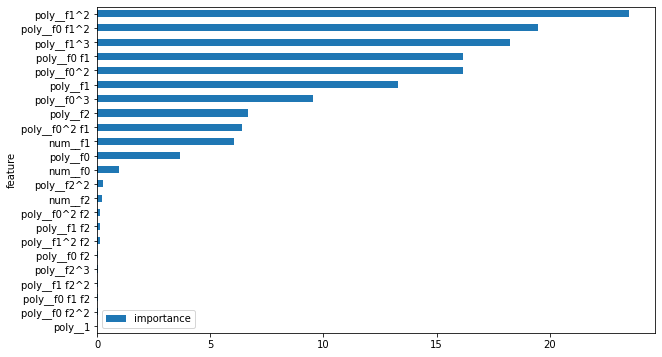

In [25]:
coefs = grid_0_0.best_estimator_.named_steps['models'].coef_
feature_importance = pd.DataFrame({'feature': grid_0_0.best_estimator_.named_steps['preprocessing'].get_feature_names_out(), 'importance': np.abs(coefs)})
feature_importance = feature_importance.sort_values('importance', ascending=True)
feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(10, 6))
plt.show()

Похоже, некоторые признаки действительно важнее остальных. На графике видна 'граница', где признаки совсем утрачивают важность - это признак 'num__f0'. Посмотрим на отсортированную таблицу важности.

In [26]:
display(feature_importance.sort_values('importance', ascending=False))

,feature,importance
7,poly__f1^2,23.478822
13,poly__f0 f1^2,19.482820
16,poly__f1^3,18.235643
5,poly__f0 f1,16.182607
4,poly__f0^2,16.170044
2,poly__f1,13.302126
10,poly__f0^3,9.518202
3,poly__f2,6.684922
11,poly__f0^2 f1,6.405874
21,num__f1,6.068522


И правда, коэффициент важности признака 'num__f0' составляет порядка 1. Попробуем обучить модель на данных с учетом признаков, чья значимость больше значимости признака 'num__f0'.

In [27]:
important_features = feature_importance.query('importance >= 0.8')['feature'].to_list()

In [28]:
X_train_0_0 = pd.DataFrame(poly_preprocessing.fit_transform(X_train_0), columns=poly_preprocessing.get_feature_names_out())
X_train_0_0 = X_train_0_0[important_features]

X_test_0_0 = pd.DataFrame(poly_preprocessing.transform(X_test_0), columns=poly_preprocessing.get_feature_names_out())
X_test_0_0 = X_test_0_0[important_features]

R^2 модели: 0.29
RMSE модели: 37.42


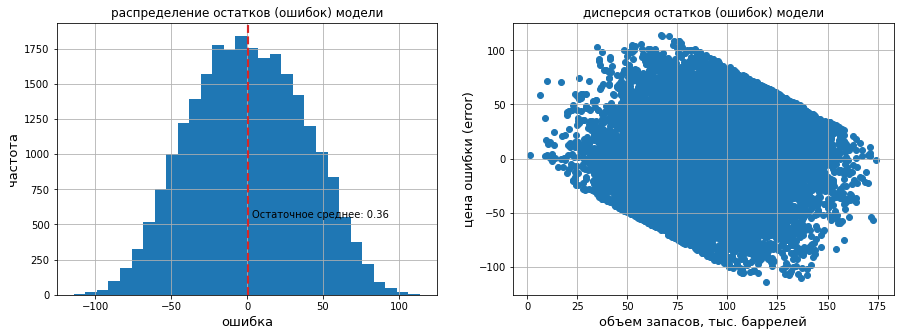

In [29]:
model = LinearRegression()
model.fit(X_train_0_0, y_train_0)

y_pred_0_1 = model.predict(X_test_0_0)

print(f'R^2 модели: {round(r2_score(y_test_0, y_pred_0_1), 2)}')
print(f'RMSE модели: {round(root_mean_squared_error(y_test_0, y_pred_0_1), 2)}')

residuals_analysis_plotter(y_test_0, y_pred_0_1, (3, 550), 30, scatter_grid=True)

In [30]:
X_train_0_0 = pd.DataFrame(poly_preprocessing.fit_transform(X_train_0), columns=poly_preprocessing.get_feature_names_out())
X_train_0_0 = X_train_0_0[important_features]

X_test_0_0 = pd.DataFrame(poly_preprocessing.transform(X_test_0), columns=poly_preprocessing.get_feature_names_out())
X_test_0_0 = X_test_0_0[important_features]

Качество модели осталось примерно таким же, как и при наличии всех остальных признаков, даже чуть ухудшилось. Качество модели в принципе выросло после введения полиномиальных признаков (R^2 поднялся на 0.02, а среднеквадратичная ошибка незначительно уменьшилась), однако выросло оно незначительно.

#### Вывод по отбору признаков для первой модели

Отбор признаков для первой модели не дал какого-то существенного результата, поэтому в дальнейшем (заглядывая вперед, при обучении третьей модели) им можно пренебречь, поскольку данные в датасетах в принципе похожи.

#### Обучение второй модели

Fitting 5 folds for each of 4 candidates, totalling 20 fits
############################################
лучший скейлер: {'preprocessing__num': RobustScaler()}
R^2 лучшей модели: 1.0
RMSE модели: 0.89
среднее предсказание лучшей модели на тесте: 68.8193838168864


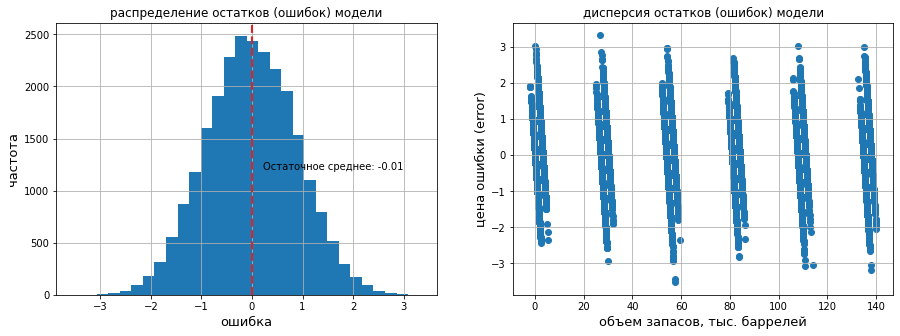

In [31]:
grid_1 = grid.fit(X_train_1, y_train_1)

y_pred_1 = grid_1.best_estimator_.predict(X_test_1)

print(f'############################################\nлучший скейлер: {grid_1.best_params_}')
print(f'R^2 лучшей модели: {round(r2_score(y_test_1, y_pred_1), 2)}')
print(f'RMSE модели: {round(root_mean_squared_error(y_test_1, y_pred_1), 2)}')
print(f'среднее предсказание лучшей модели на тесте: {y_pred_1.mean()}')

residuals_analysis_plotter(y_test_1, y_pred_1, (0.21, 1200), 30, scatter_grid=True)

Вторая модель оказалась самой лучшей - у неё максимальный коэффициент детерминации и малая среднеквадратичная ошибка. Ошибки распределены нормально вокруг нуля с незначительным смещением влево; дисперсия ошибок мала и постоянна. Такое значение коэффициента детерминации говорит о практически полной зависимости целевой переменной от входных, а важность признака 'f2' для модели опять косвенно подтвеждается диаграммой рассеяния ошибок.

#### Обучение третьей модели

Fitting 5 folds for each of 4 candidates, totalling 20 fits
############################################
лучший скейлер: {'preprocessing__num': StandardScaler()}
R^2 лучшей модели: 0.2
RMSE модели: 40.14
среднее предсказание лучшей модели на тесте: 95.08577045778986


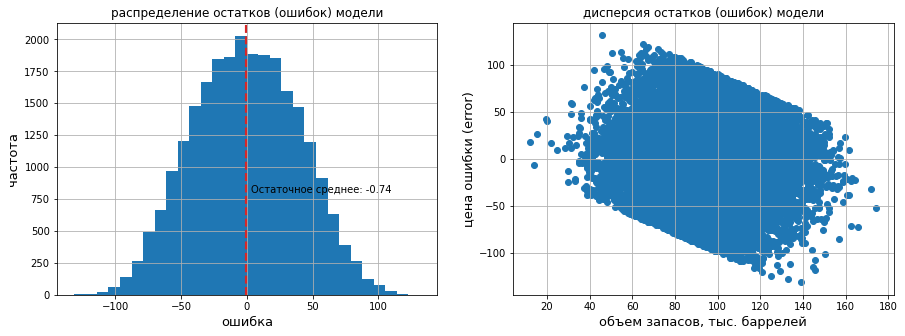

In [32]:
grid_2 = grid.fit(X_train_2, y_train_2)

y_pred_2 = grid_2.best_estimator_.predict(X_test_2)

print(f'############################################\nлучший скейлер: {grid_2.best_params_}')
print(f'R^2 лучшей модели: {round(r2_score(y_test_2, y_pred_2), 2)}')
print(f'RMSE модели: {round(root_mean_squared_error(y_test_2, y_pred_2), 2)}')
print(f'среднее предсказание лучшей модели на тесте: {y_pred_2.mean()}')

residuals_analysis_plotter(y_test_2, y_pred_2, (3, 800), 30, scatter_grid=True)

Третья модель показала ещё более плохие результаты, чем первая. К ней применимо всё то же самое.

### Проверка моделей на адекватность

Проверим наши модели на адекватность предсказанием константы.

In [33]:
dummy_pipe = Pipeline(
    [
        ('preprocessing', data_preprocessing),
        ('models', DummyRegressor())
    ]
)

dummy_params = [
    {
        'models': [DummyRegressor()],
        'models__strategy': ['mean',
                             'median'
                            ],
        'preprocessing__num': [StandardScaler(),
                               MinMaxScaler(),
                               RobustScaler(),
                               'passthrough'
                              ]
    },
    {
        'models': [DummyRegressor()],
        'models__strategy': ['quantile'],
        'models__quantile': np.arange(0, 1, 0.05),
        'preprocessing__num': [StandardScaler(),
                               MinMaxScaler(),
                               RobustScaler(),
                               'passthrough'
                              ]
    },
    {
        'models': [DummyRegressor()],
        'models__strategy': ['constant'],
        'models__constant': np.arange(0, 1, 0.01),
        'preprocessing__num': [StandardScaler(),
                               MinMaxScaler(),
                               RobustScaler(),
                               'passthrough'
                              ]
    }
]

dummy_grid = GridSearchCV(dummy_pipe,
                          param_grid=dummy_params,
                          cv=5,
                          scoring='neg_root_mean_squared_error',
                          n_jobs=-1,
                          verbose=1
                         )

Обучим первую dummy-модель и сравним результаты.

In [34]:
dummy_grid_0 = dummy_grid.fit(X_train_0, y_train_0)

dummy_pred_0 = dummy_grid_0.predict(X_test_0)

print('###########################################')
print(f'Лучший показатель RMSE при кросс-валидации: {round(np.abs(dummy_grid_0.best_score_), 2)}')
print(f'RMSE на тестовых данных: {round(root_mean_squared_error(y_test_0, dummy_pred_0), 2)}')
print(f'R^2 на тестовых данных: {round(r2_score(y_test_0, dummy_pred_0), 2)}')
print('###########################################')
print(f'Показатель RMSE ориг_модели на тесте: {round(root_mean_squared_error(y_test_0, y_pred_0), 2)}')
print(f'R^2 ориг_модели на тесте: {round(r2_score(y_test_0, y_pred_0), 2)}')

Fitting 5 folds for each of 488 candidates, totalling 2440 fits
###########################################
Лучший показатель RMSE при кросс-валидации: 44.28
RMSE на тестовых данных: 44.32
R^2 на тестовых данных: -0.0
###########################################
Показатель RMSE ориг_модели на тесте: 37.79
R^2 ориг_модели на тесте: 0.27


Коэффициент детерминации при предсказании константы равен 0, что неудивительно. Тем не менее, среднеквадратичная ошибка почти такая же, как и у модели. Похоже, модель действительно получилась плохой и предсказывает чуть лучше dummy-модели, что неутешительно.

In [35]:
dummy_grid_1 = dummy_grid.fit(X_train_1, y_train_1)

dummy_pred_1 = dummy_grid_1.predict(X_test_1)

print('###########################################')
print(f'Лучший показатель RMSE при кросс-валидации: {round(np.abs(dummy_grid_1.best_score_), 2)}')
print(f'RMSE на тестовых данных: {round(root_mean_squared_error(y_test_1, dummy_pred_1), 2)}')
print(f'R^2 на тестовых данных: {round(r2_score(y_test_1, dummy_pred_1), 2)}')
print('###########################################')
print(f'Показатель RMSE ориг_модели на тесте: {round(root_mean_squared_error(y_test_1, y_pred_1), 2)}')
print(f'R^2 ориг_модели на тесте: {round(r2_score(y_test_1, y_pred_1), 2)}')

Fitting 5 folds for each of 488 candidates, totalling 2440 fits
###########################################
Лучший показатель RMSE при кросс-валидации: 45.99
RMSE на тестовых данных: 45.81
R^2 на тестовых данных: -0.0
###########################################
Показатель RMSE ориг_модели на тесте: 0.89
R^2 ориг_модели на тесте: 1.0


Вторая модель действительно получилась хорошей и практически полностью соответствует данным, отрыв метрик по сравнению с dummy-моделью космический.

In [36]:
dummy_grid_2 = dummy_grid.fit(X_train_2, y_train_2)

dummy_pred_2 = dummy_grid_2.predict(X_test_2)

print('###########################################')
print(f'Лучший показатель RMSE при кросс-валидации: {round(np.abs(dummy_grid_2.best_score_), 2)}')
print(f'RMSE на тестовых данных: {round(root_mean_squared_error(y_test_2, dummy_pred_2), 2)}')
print(f'R^2 на тестовых данных: {round(r2_score(y_test_2, dummy_pred_2), 2)}')
print('###########################################')
print(f'Показатель RMSE ориг_модели на тесте: {round(root_mean_squared_error(y_test_2, y_pred_2), 2)}')
print(f'R^2 ориг_модели на тесте: {round(r2_score(y_test_2, y_pred_2), 2)}')

Fitting 5 folds for each of 488 candidates, totalling 2440 fits
###########################################
Лучший показатель RMSE при кросс-валидации: 44.73
RMSE на тестовых данных: 44.83
R^2 на тестовых данных: -0.0
###########################################
Показатель RMSE ориг_модели на тесте: 40.14
R^2 ориг_модели на тесте: 0.2


Третья модель получилась самой худшей и плохо предсказывает целевой признак, её среднеквадратичная ошибка наиболее близка к RMSE dummy-модели.

### Выводы

Из трех регрессионных моделей хорошей (если не отличной) оказалась только одна; две остальные очень плохо справляются с данными и их предсказания несильно отличаются от константных. Вероятнее всего, это связано с особенностями данных, которые мы подметили ранее. Похоже, в данных содержатся особые нелинейные закономерности, и регрессия попросту не подходит, однако по условиям задачи нам необходимо использовать только линейную регрессию, поэтому оставим работу моделей как есть, тем более суть задания заключается в другом.

## Подготовка к расчёту прибыли

Приступим к расчету достаточного запаса сырья для безубыточной добычи. Рассчитаем средний запас исходя из условий задачи:

In [37]:
well_mean_capacity_needed = round(BUDGET_AKA_COSTS / (ITEM_PRICE * BEST_WELLS), 2)

print('Средний объем сырья для безубыточной добычи:', well_mean_capacity_needed)

Средний объем сырья для безубыточной добычи: 111.11


Похоже, для безубыточной добычи нам необходимо в среднем получать 111.11 тыс. баррелей со скважины. Сравним это значение это средними значениями в данных.

In [38]:
print('Средний запас скважины в первом регионе:', round(gd_0['product'].mean(), 2))
print('Средний запас скважины во втором регионе:', round(gd_1['product'].mean(), 2))
print('Средний запас скважины в третьем регионе:', round(gd_2['product'].mean(), 2))

Средний запас скважины в первом регионе: 92.5
Средний запас скважины во втором регионе: 68.83
Средний запас скважины в третьем регионе: 95.0


Средние значения объема запасов скважин во всех регионах ощутимо ниже, чем необходимое среднее, особенно во втором регионе. Попробуем оценить вероятность встретить скважину с объемом 111.11 тыс. баррелей и больше среди 500 случайных скважин для разработки при допущении, что объем запасов в выборках распределен нормально.

In [39]:
results_0 = needed_mean_capacity_probability_evaluation(gd_0)
results_1 = needed_mean_capacity_probability_evaluation(gd_1)
results_2 = needed_mean_capacity_probability_evaluation(gd_2)

print('Усредненная ероятность найти скважину с объемом 111.11 тыс. баррелей и больше в первом регионе:', results_0)
print('Усредненная вероятность найти скважину с объемом 111.11 тыс. баррелей и больше во втором регионе:', results_1)
print('Усредненная вероятность найти скважину с объемом 111.11 тыс. баррелей и больше в третьем регионе:', results_2)

Усредненная ероятность найти скважину с объемом 111.11 тыс. баррелей и больше в первом регионе: 0.34
Усредненная вероятность найти скважину с объемом 111.11 тыс. баррелей и больше во втором регионе: 0.18
Усредненная вероятность найти скважину с объемом 111.11 тыс. баррелей и больше в третьем регионе: 0.36


### Вывод по подготовке расчета прибыли

В целом, мы получили закономерный результат. В первом и третьем регионах вероятность встретить скважину с искомым объемом действительно высока (порядка 0.35), чего не скажешь о втором регионе. Напоминание: если вероятность встретить то или иное значение равна или близка к 0.5, то это значение можно считать средним или близким к таковому. При принятии решений стоит учитывать полученный результат.

Далее оценим вероятность убытков и получения прибыли с учетом прогнозов построенных ранее моделей.

## Расчет рисков и прибыли в каждом регионе

Функция для расчета прибыли находится в начале проекта.

### Первый регион

С помощью техники bootstrap найдем распределение прибыли для первого региона на основе предсказаний модели и соответствующих им реальных данных. Будем использовать тысячу выборок, как указано в условии задачи.

In [40]:
profit_dist_0_1 = bootstrap(y_test_0, y_pred_0, 1000)

Проверим полученное распределение прибыли на нормальность, на всякий случай (alpha=0.05).

In [41]:
normtest(profit_dist_0_1)

p-value теста Шапиро-Уилка: 0.03679567575454712
Вероятно, распределение не нормальное


По всей видимости, у нас недостаточно оснований считать распределение нормальным, поэтому расчеты, основанные на типе распределения нам не подойдут. Далее рассчитаем доверительный интервал и среднюю прибыль.

In [42]:
profit_mean(profit_dist_0_1)
confidence_interval(profit_dist_0_1)

Средняя выборочная прибыль: 645.37M
95%-й доверительный интервал распределения прибыли: 54.06M — 1.26B


95%-ый доверительный интервал для прибыли равен (54.06 млн., 1.26 млрд.), а ожидаемая средняя прибыль - 645.37 млн. Теперь рассчитаем вероятность убытков и заодно нарисуем график для наглядности.

Вероятность понести убытки: 1.9%
2.5%-й квантиль для распределения потенциальной прибыли в регионе: 54.06M


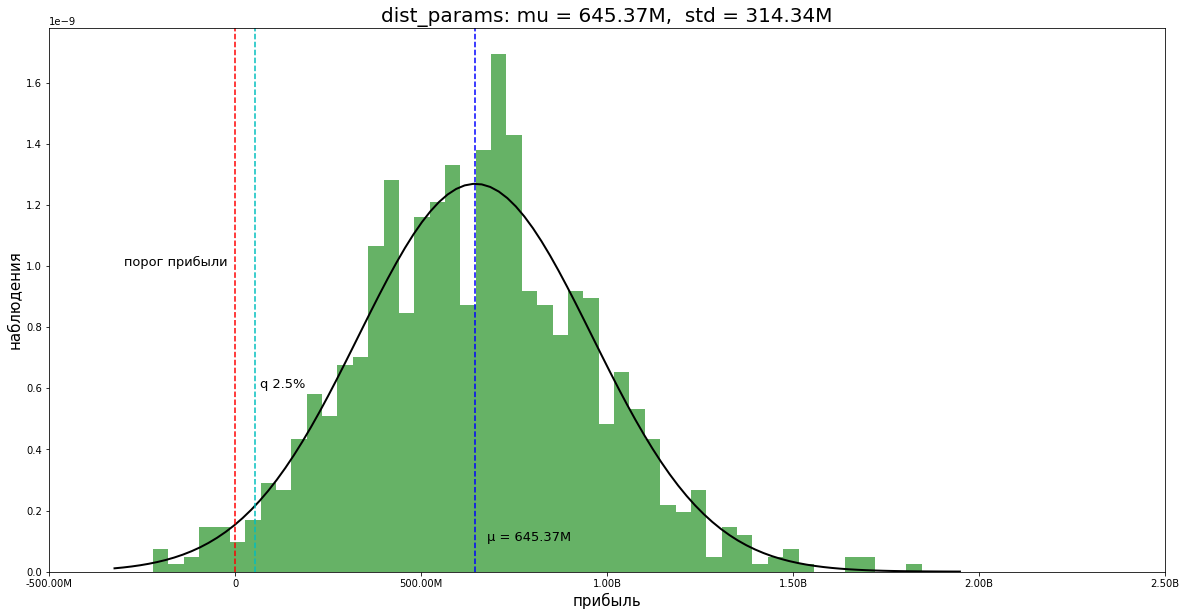

In [43]:
loss_graph(profit_dist_0_1)

Итак, выборочное среднее равно 650.31 млн., а вероятность понести убытки составляет 1.9%, что удовлетворяет условиям задачи. Отбором лучшего региона для разработки займемся далее.

### Второй регион

Проделаем все те же самые манипуляции с данными и моделью для второго региона.

Опять попробуем проверить распределение на нормальность.

In [44]:
profit_dist_1_1 = bootstrap(y_test_1, y_pred_1, 1000)
normtest(profit_dist_1_1)

p-value теста Шапиро-Уилка: 0.0023839534260332584
Вероятно, распределение не нормальное


In [45]:
profit_mean(profit_dist_1_1)
confidence_interval(profit_dist_1_1)

Средняя выборочная прибыль: 641.38M
95%-й доверительный интервал распределения прибыли: 139.47M — 1.21B


Вероятность понести убытки: 0.6%
2.5%-й квантиль для распределения потенциальной прибыли в регионе: 139.47M


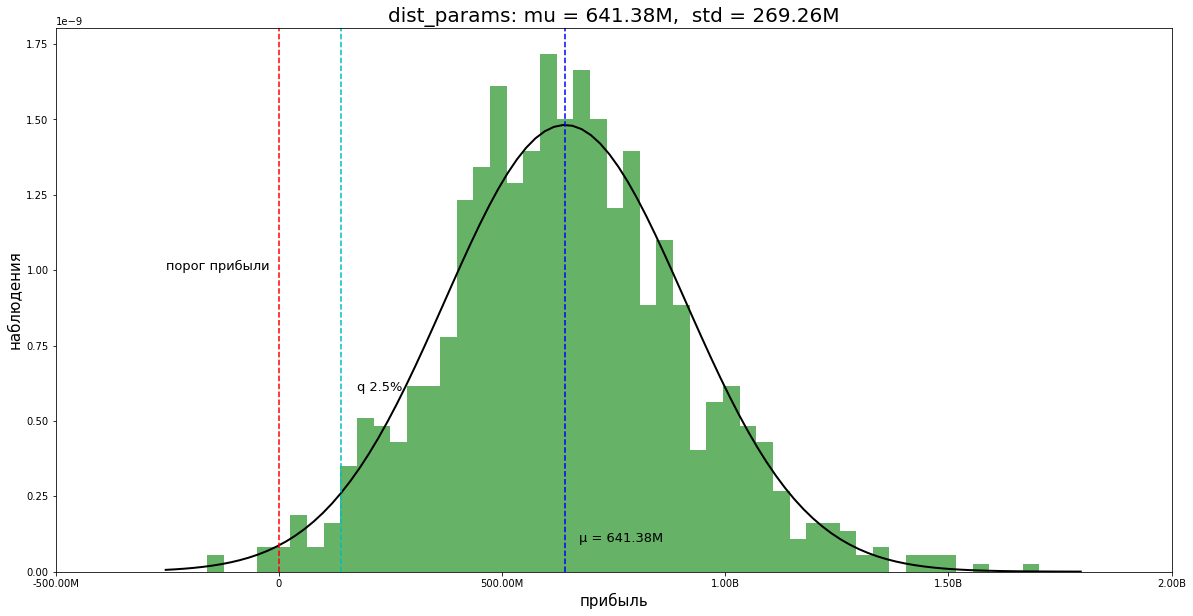

In [46]:
loss_graph(profit_dist_1_1)

Вероятность убытков составляет всего 0.6%, что является лучшим результатом и удовлетворяет условиям задачи. 0.025 квантиль равен 139.47 млн.

### Третий регион

Рассчитаем всё те же показатели для третьего региона по тому же алгоритму.

In [47]:
profit_dist_2_1 = bootstrap(y_test_2, y_pred_2, 1000)
normtest(profit_dist_2_1)

p-value теста Шапиро-Уилка: 0.03485266491770744
Вероятно, распределение не нормальное


Это распределение тоже не является нормальным.

Рассчитываем среднее и 95%-й доверительный интервал.

In [48]:
profit_mean(profit_dist_2_1)
confidence_interval(profit_dist_2_1)

Средняя выборочная прибыль: 523.03M
95%-й доверительный интервал распределения прибыли: -91.21M — 1.19B


Строим график для нашего распределения прибыли.

Вероятность понести убытки: 5.1%
2.5%-й квантиль для распределения потенциальной прибыли в регионе: -91.21M


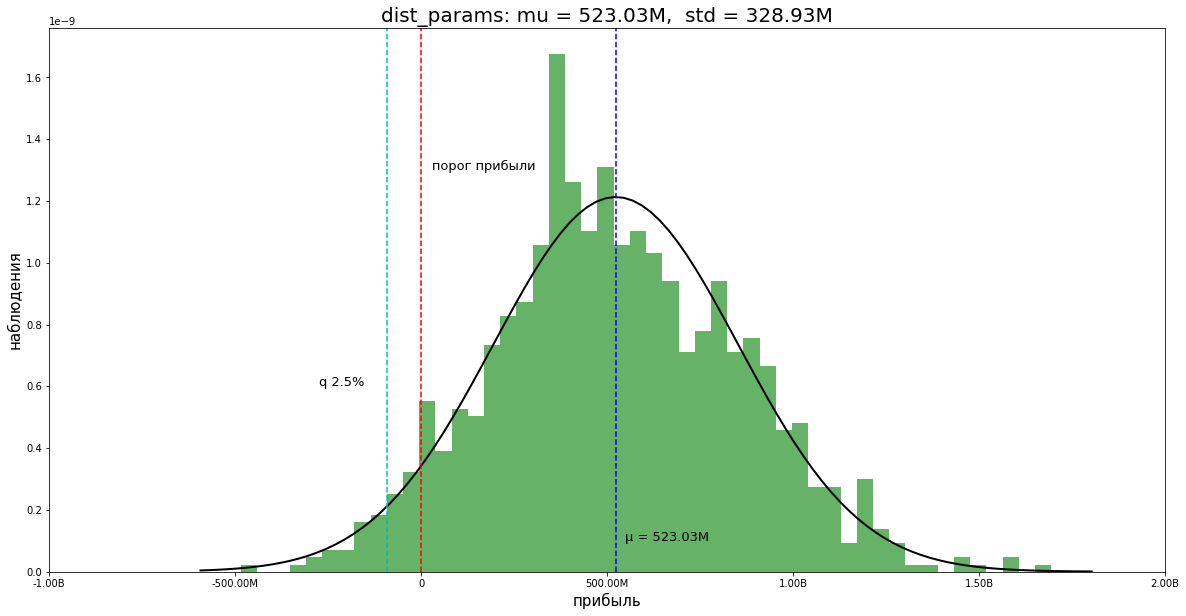

In [49]:
loss_graph(profit_dist_2_1)

В этом регионе наибольшая вероятность понести убытки (5.1%), поэтому данный регион точно отметается. Это подтвеждается значением 2.5%-ого квантиля, которое находится за порогом прибыли и составляет -91.21 млн.

### Итоговый отчет

Согласно условиям задачи, для разработки месторождений подходят только те регионы, вероятность понести убытки в которых не превышает 2.5%. Отсюда следует, что выбирать придется всего из двух регионов - первого и второго. Вот характеристики регионов и потенциальной прибыли:
****
1. первый регион:
    - ожидаемая средняя прибыль: **645.37 млн. руб.**
    - 95%-й доверительный интервал для средней прибыли: **54.06 млн. — 1.26 млрд. руб.**
    - вероятность понести убытки: **1.9%**
    - 2.5%-й квантиль: **54.06 млн. руб.**
    - ожидаемый объем случайного месторождения: **92.5 тыс. баррелей**
    - оценка вероятности нахождения случайного месторождения с усредненным минимальным объемом запасов: **34%**
****
2. второй регион:
    - ожидаемая средняя прибыль: **641.38 млн. руб.**
    - 95%-й доверительный интервал для средней прибыли: **139.47 млн. — 1.21 млрд. руб.**
    - вероятность понести убытки исходя из cdf-расчета: **0.6%**
    - 2.5%-й квантиль: **139.47 млн. руб.**
    - ожидаемый объем случайного месторождения: **68.83 тыс. баррелей**
    - оценка вероятности нахождения случайного месторождения с усредненным минимальным объемом запасов: **18%**
****
3. При выборе также следует учитывать характеристики построенных моделей. Модель для первого региона работает не очень хорошо, в то время как модель для второго региона хорошо объясняет данные и делает точные предсказания.

1. **Исходя из проведенных расчетов и полученных значений** можно заключить, что наилучшим вариантом для разработки нефтяных месторождений будет выбрать именно второй регион. Данный выбор можно обосновать ощутимо меньшей вероятностью убытков, а также тем, что построенная модель гораздо лучше описывает данные и делает более точные предсказания, что подкрепляет достоверность расчетов. Ожидаемая прибыль в данном регионе чуть меньше ожидаемой прибыли в первом регионе, однако её разброс также меньше.
2. Единственная загвозка заключается в ожидаемом объеме запасов случайного месторождения и вероятности нахождения скважины с минимальным средним объемом запасов и выше: первый регион в этом плане смотрится "симпатичнее", учитывая что количество рассматриваемых и потенциально разрабатываемых месторождений сильно ограничено.

**Итого:** на основании имеющихся данных, проведенных расчетов и обозначенных выводов для разработки месторождений стоит выбрать именно второй регион, так как это надежнее. Тем не менее, вероятно, можно попробовать поработать с данными или подобрать другие модели, которые лучше бы объясняли данные первого региона и имели бы большую предсказательную силу: это могло бы уменьшить вероятность убытков и сильнее подкрепить расчеты. Первый регион, согласно реальным признакам, выглядит перспективнее второго, однако для его выбора в данной ситуации нам не хватает обоснованной оценки, максимально приближенной к реальности.